# Задача 1

In [1]:
import pandas as pd
data = pd.read_csv('ionosphere.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [10]:
data_prepared = data[data.columns[2:]]
data_prepared.loc[data_prepared[34] == 'g', 34] = 1
data_prepared.loc[data_prepared[34] == 'b', 34] = 0
data_prepared = pd.DataFrame(data=data_prepared, dtype=float)
data_prepared_numpy = data_prepared.values
data_prepared.head()

,2,3,4,5,6,7,8,9,10,11,...,25,26,27,28,29,30,31,32,33,34
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,1.0
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,0.0
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,1.0
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,0.0
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,1.0


In [3]:
import numpy as np
import cvxpy as cp

A = data_prepared_numpy[:, :-1]
b = data_prepared_numpy[:, -1]
c = 1.0
x = cp.Variable(A.shape[1])

In [4]:
objective = cp.Minimize(0.5 * cp.sum_squares(A * x - b) + c * cp.sum(cp.abs(x)))
problem = cp.Problem(objective)
res = problem.solve()
print('Nonzero features for c = {}: {}'.format(c, np.sum(abs(x.value) > 1e-10)))

Nonzero features for c = 1.0: 24


In [5]:
x.value

array([ 3.03672738e-01,  1.46101618e-01,  2.30619941e-01,  1.03191651e-01,
        1.87754636e-01,  2.33057820e-01,  1.38205984e-01,  8.01656955e-02,
        3.11314339e-21, -2.70007653e-21, -1.90079476e-02,  7.57826153e-02,
        2.30537170e-21,  3.70638129e-03,  3.29696271e-02,  2.01370318e-02,
        5.22906595e-21,  5.01576145e-21,  3.19542650e-02, -2.26074852e-01,
        7.18729444e-02,  2.80493251e-21,  2.16298656e-02,  1.85502670e-01,
       -6.65633607e-02, -8.48142394e-02,  2.81363603e-02,  9.19702407e-21,
        1.19213047e-01, -1.73690257e-21, -9.84937450e-02, -1.16089592e-01])

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
c_s = np.arange(0.1, 200, 0.3)

In [7]:
features = []
for c in c_s:
    x = cp.Variable(A.shape[1])
    objective = cp.Minimize(0.5 * cp.sum_squares(A * x - b) + c * cp.sum(cp.abs(x)))
    problem = cp.Problem(objective)
    res = problem.solve()
    features.append(np.sum(abs(x.value) > 1e-10))

Text(0, 0.5, 'n_features')

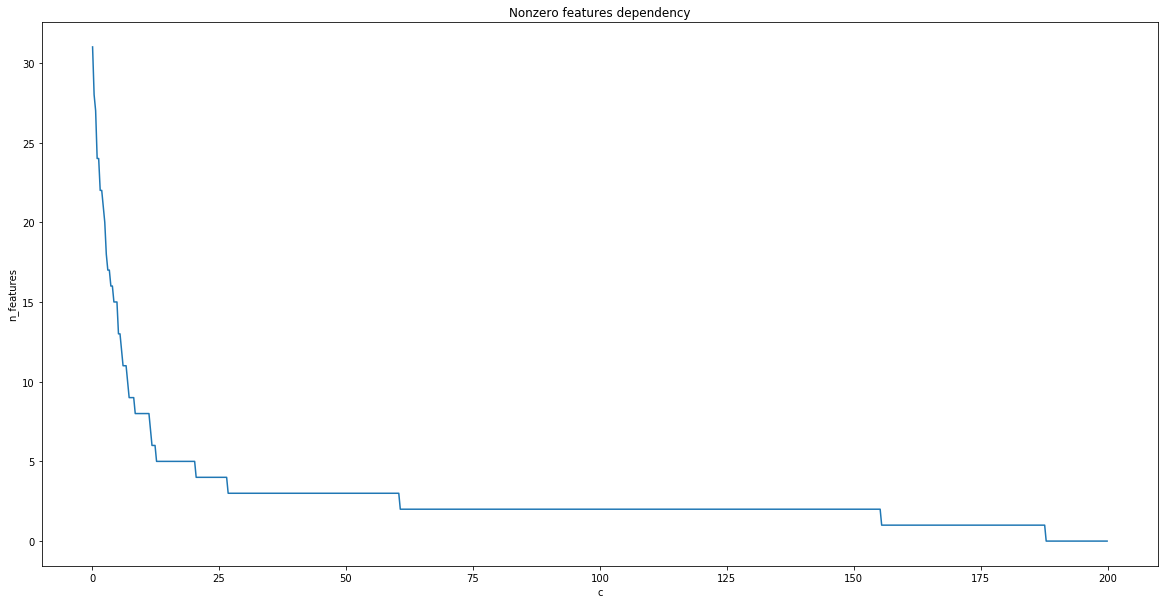

In [12]:
plt.figure(figsize=(20, 10))
plt.plot(c_s, features)
plt.title('Nonzero features dependency')
plt.xlabel('c')
plt.ylabel('n_features')